In [2]:
WORKING_DIR = "/home/xavier/Documents/DAE_project"

## Together

Reading log files...
  - Finished processing: events.out.tfevents.1715709358.bc13u30n1.64581.0
  - Finished processing: events.out.tfevents.1715986489.bc13u30n1.37218.0
Finished loading data.

Plot saved successfully to: /home/xavier/Documents/DAE_project/images/figure2/training_loss_curve.pdf


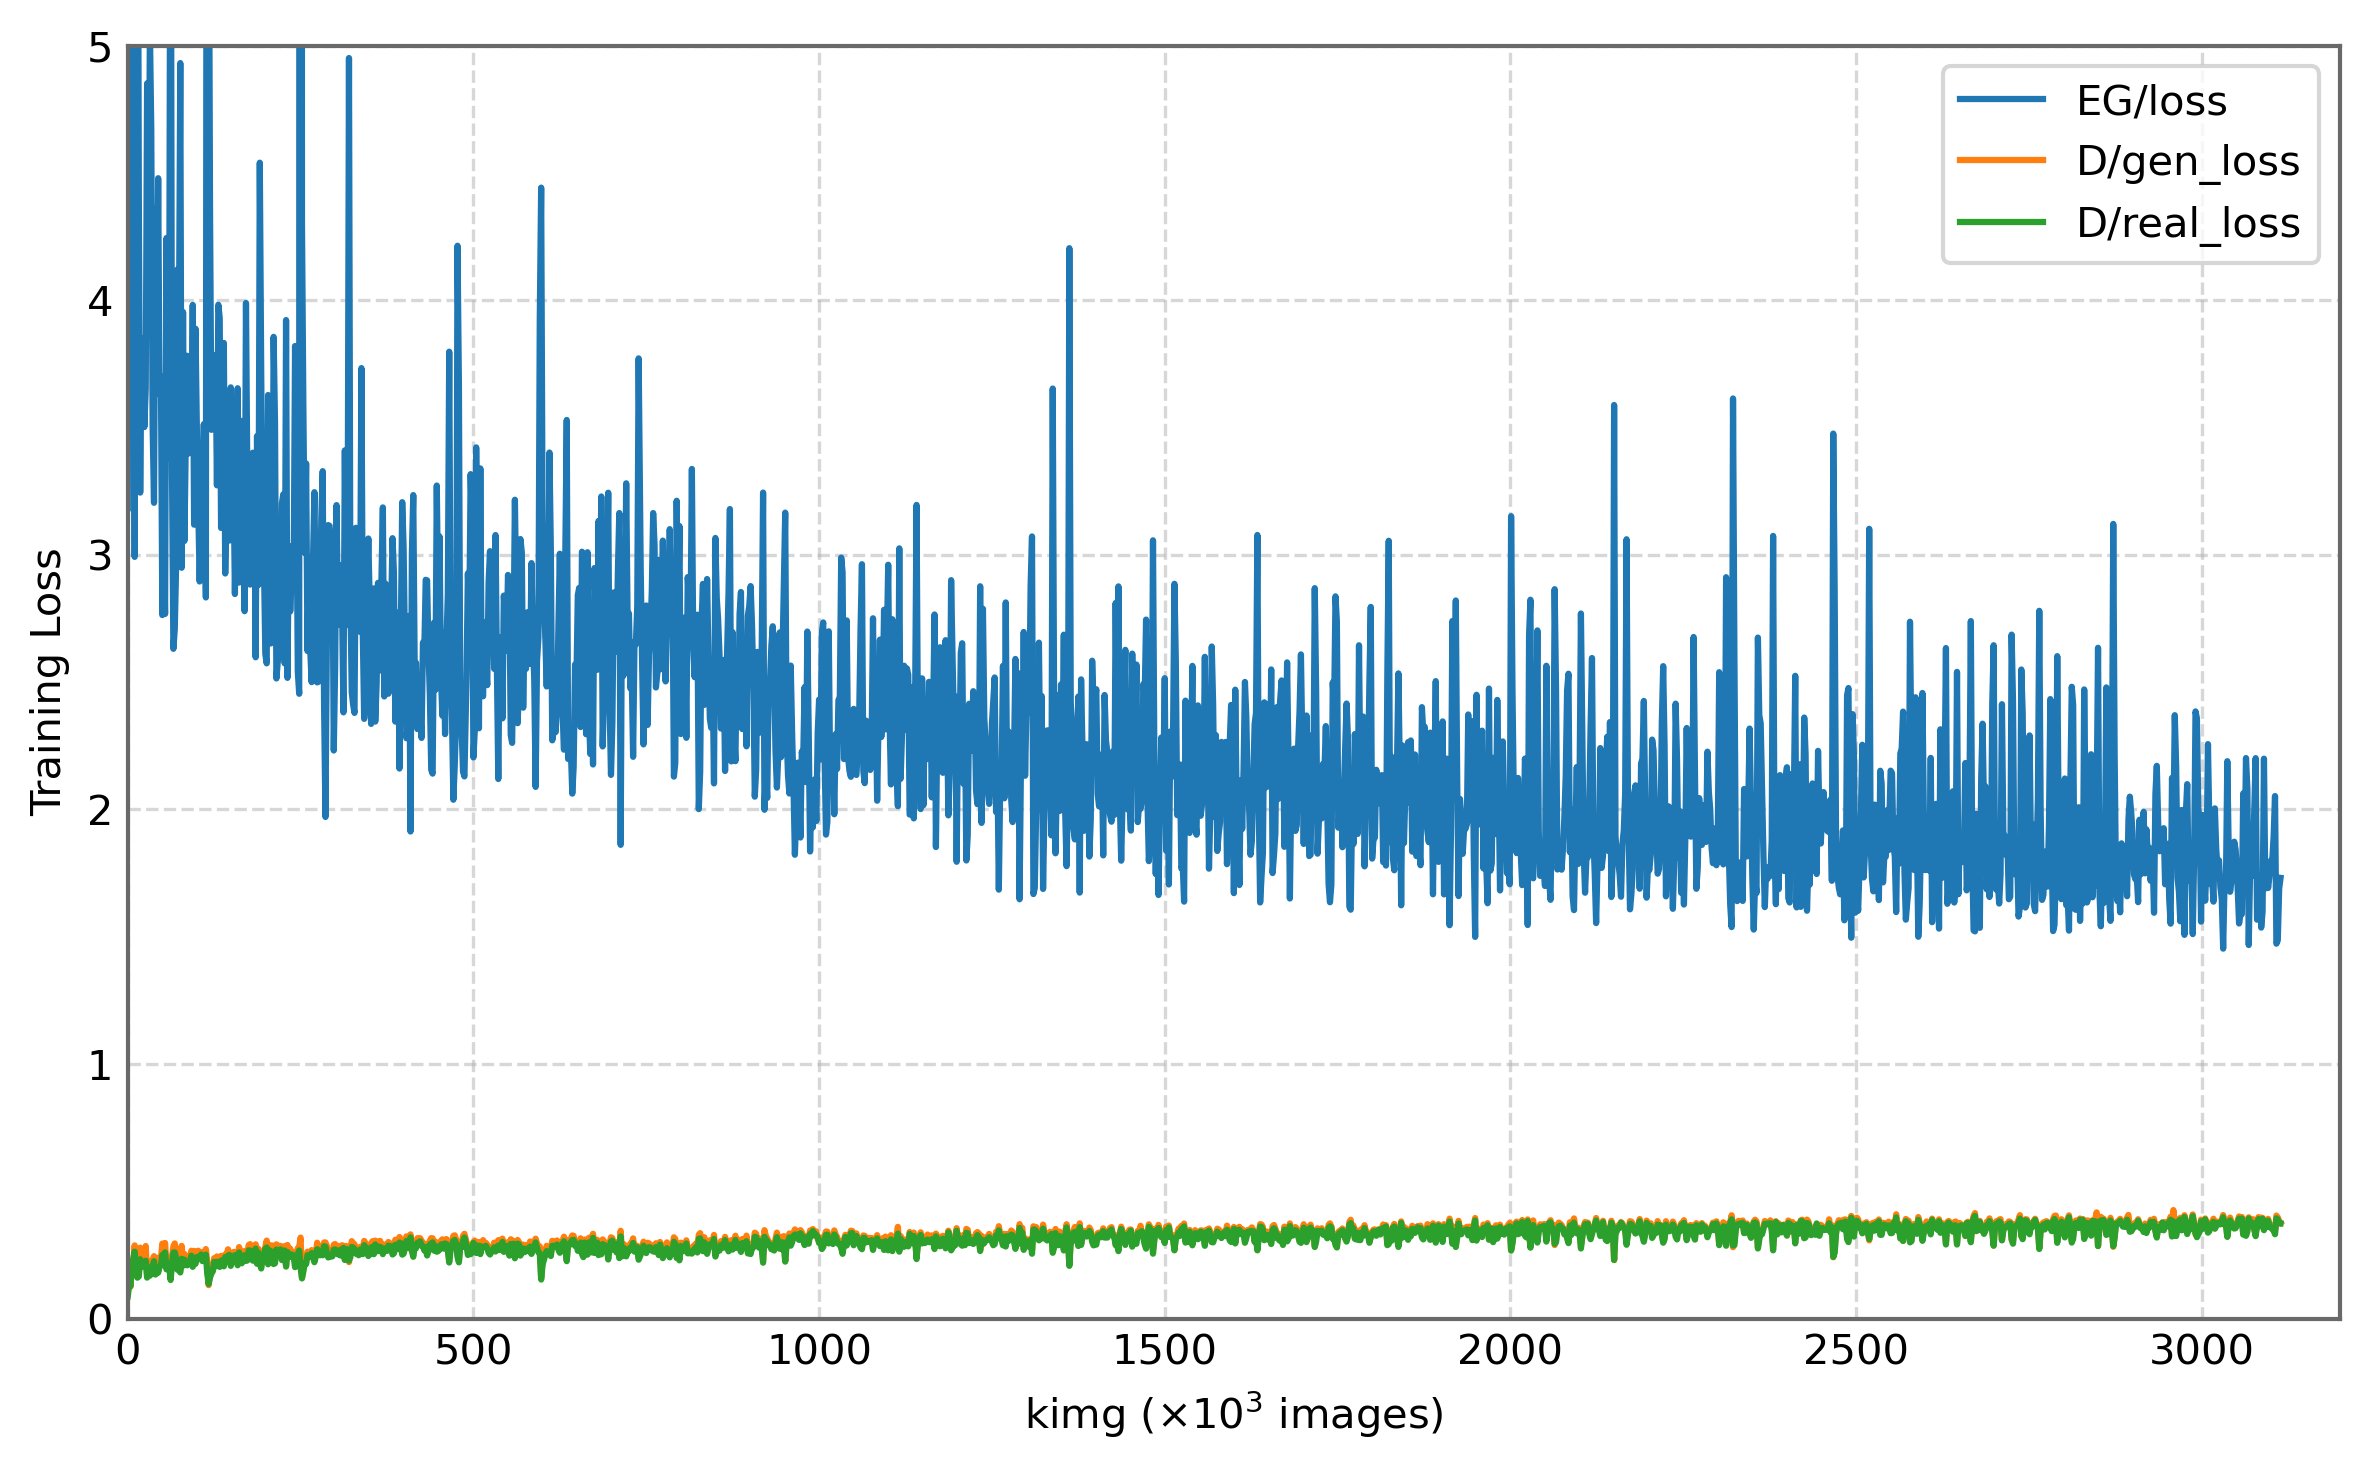

In [30]:
import matplotlib.pyplot as plt
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np  # Added numpy import for potential future use


def style_ax(ax):
    """
    Unified styling for the plot axes.
    - Sets a transparent background.
    - Sets spine (border) color to gray.
    - Adds a dashed grid behind plot elements.
    - Removes tick marks.
    """
    # Gray frame for the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('dimgray')
    # Grid lines appear behind the plot lines
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    # Remove tick marks for a cleaner look
    ax.tick_params(axis='both', which='both', length=0)


def load_tensorboard_data(logfiles, tags):
    """
    Loads scalar data from one or more TensorBoard event files.

    Args:
        logfiles (list): A list of paths to the .tfevents files.
        tags (list): A list of the scalar tags to extract (e.g., 'Loss/G_loss').

    Returns:
        dict: A dictionary where keys are tags and values are tuples of (steps, values).
    """
    tag_data = {tag: ([], []) for tag in tags}
    last_step = 0
    print("Reading log files...")
    for log in logfiles:
        try:
            ea = EventAccumulator(log, size_guidance={'scalars': 0})
            ea.Reload()

            available_tags = set(ea.Tags().get('scalars', []))

            # Find the last step in the current file to correctly offset the next one
            file_last_step = 0
            for tag in tags:
                if tag in available_tags:
                    for s in ea.Scalars(tag):
                        file_last_step = max(file_last_step, s.step)

            # Append data, offsetting by the cumulative step count
            for tag in tags:
                if tag in available_tags:
                    steps, values = tag_data[tag]
                    for s in ea.Scalars(tag):
                        # Avoid duplicating the step=0 point from a continued run
                        if not (s.step == 0 and last_step != 0):
                            steps.append(last_step + s.step)
                            values.append(s.value)

            last_step += file_last_step
            print(f"  - Finished processing: {os.path.basename(log)}")
        except Exception as e:
            print(f"Could not read file {log}: {e}")
    print("Finished loading data.")
    return tag_data


def plot_training_curve(ax, logdirs, tags):
    """
    Plots the loaded TensorBoard data onto a given matplotlib Axes object.

    Args:
        ax (matplotlib.axes.Axes): The axes object to plot on.
        logdirs (list): List of paths to the event files.
        tags (dict): A dictionary mapping the tag name to its desired label in the legend.
    """
    tag_data = load_tensorboard_data(logdirs, list(tags.keys()))

    for tag, (steps, values) in tag_data.items():
        if steps and values:  # Only plot if data was found
            ax.plot(steps, values, label=tags[tag])
        else:
            print(f"Warning: No data found for tag '{tag}'")


# --- Main Execution ---
if __name__ == "__main__":
    # Define file paths and output directory
    logdirs = [
        f"{WORKING_DIR}/models/events.out.tfevents.1715709358.bc13u30n1.64581.0",
        f"{WORKING_DIR}/models/events.out.tfevents.1715986489.bc13u30n1.37218.0"
    ]
    OUT_DIR = f"{WORKING_DIR}/images/figure2"

    # Ensure the output directory exists
    os.makedirs(OUT_DIR, exist_ok=True)

    # Define the curves to plot and their labels for the legend
    tags_to_plot = {
        "training_Loss/G/loss": "EG/loss",
        "training_Loss/D/gen_loss": "D/gen_loss",
        "training_Loss/D/real_loss": "D/real_loss"
    }

    # Set plot style and parameters
    plt.rcParams.update({
        'font.size': 10,
        'font.family': 'Arial',
        'axes.labelsize': 10,
        'axes.titlesize': 12,
        'lines.linewidth': 1.5,
        'legend.fontsize': 10,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'axes.linewidth': 1.0
    })

    # --- Create the Plot ---
    # Use plt.subplots() to get both the figure and axes objects
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the data onto the axes
    plot_training_curve(ax, logdirs, tags_to_plot)

    # Set plot limits, labels, and legend
    ax.set_ylim([0, 5])
    ax.set_xlim([0, 3200])
    ax.set_xlabel(r"kimg ($\times 10^3$ images)")
    ax.set_ylabel("Training Loss")
    ax.legend()

    # Apply custom styling
    style_ax(ax)
    # Save the figure
    output_path = os.path.join(OUT_DIR, "training_loss_curve.pdf")
    plt.tight_layout()
    plt.savefig(output_path, format="pdf", dpi=300, transparent=True)

    print(f"\nPlot saved successfully to: {output_path}")

    # Optionally, display the plot
    plt.show()

## Split

Reading log files...
  - Finished processing: events.out.tfevents.1715709358.bc13u30n1.64581.0


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


  - Finished processing: events.out.tfevents.1715986489.bc13u30n1.37218.0
Finished loading data.

Plot saved successfully to: /home/xavier/Documents/DAE_project/images/figure2/training_loss_curve_split.pdf


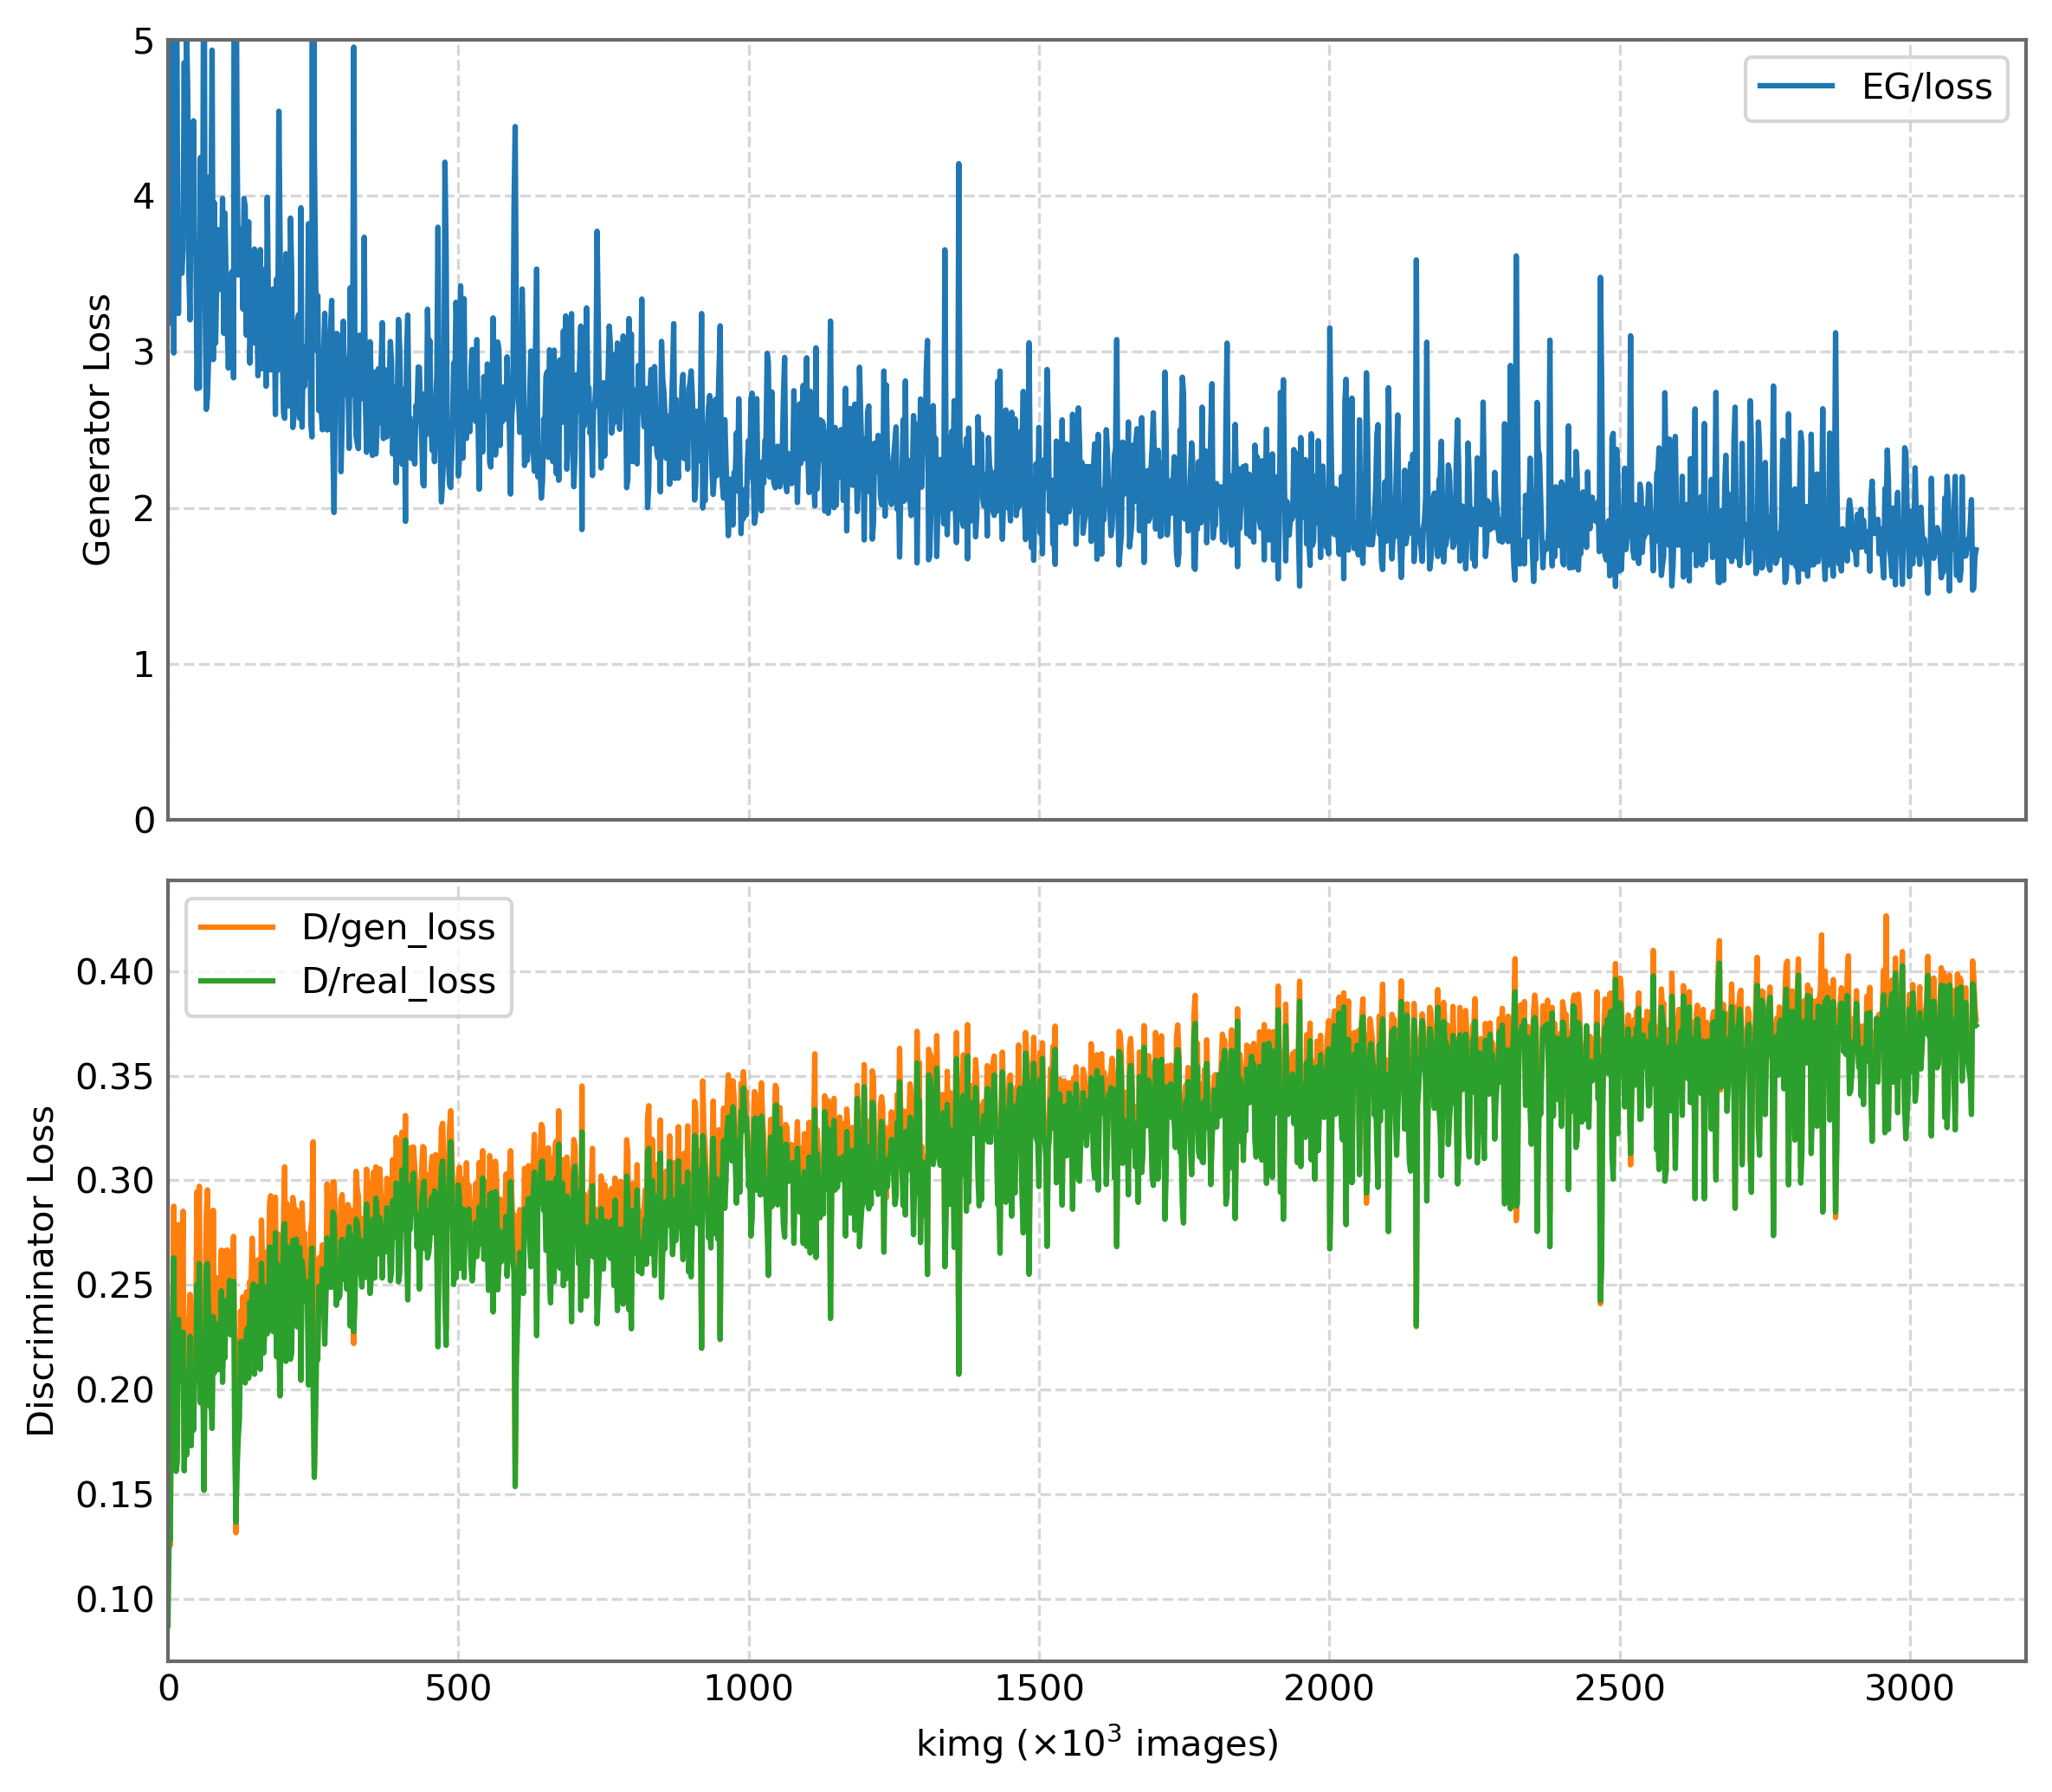

In [29]:
import matplotlib.pyplot as plt
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np  # Added numpy import for potential future use

import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['text.usetex'] = False


def style_ax(ax):
    """
    Unified styling for the plot axes.
    - Sets a transparent background.
    - Sets spine (border) color to gray.
    - Adds a dashed grid behind plot elements.
    - Removes tick marks.
    """
    # Gray frame for the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('dimgray')
    # Grid lines appear behind the plot lines
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    # Remove tick marks for a cleaner look
    ax.tick_params(axis='both', which='both', length=0)


def load_tensorboard_data(logfiles, tags):
    """
    Loads scalar data from one or more TensorBoard event files.

    Args:
        logfiles (list): A list of paths to the .tfevents files.
        tags (list): A list of the scalar tags to extract (e.g., 'Loss/G_loss').

    Returns:
        dict: A dictionary where keys are tags and values are tuples of (steps, values).
    """
    tag_data = {tag: ([], []) for tag in tags}
    last_step = 0
    print("Reading log files...")
    for log in logfiles:
        try:
            ea = EventAccumulator(log, size_guidance={'scalars': 0})
            ea.Reload()

            available_tags = set(ea.Tags().get('scalars', []))

            # Find the last step in the current file to correctly offset the next one
            file_last_step = 0
            for tag in tags:
                if tag in available_tags:
                    for s in ea.Scalars(tag):
                        file_last_step = max(file_last_step, s.step)

            # Append data, offsetting by the cumulative step count
            for tag in tags:
                if tag in available_tags:
                    steps, values = tag_data[tag]
                    for s in ea.Scalars(tag):
                        # Avoid duplicating the step=0 point from a continued run
                        if not (s.step == 0 and last_step != 0):
                            steps.append(last_step + s.step)
                            values.append(s.value)

            last_step += file_last_step
            print(f"  - Finished processing: {os.path.basename(log)}")
        except Exception as e:
            print(f"Could not read file {log}: {e}")
    print("Finished loading data.")
    return tag_data


# --- Main Execution ---
if __name__ == "__main__":
    # Define file paths and output directory
    logdirs = [
        f"{WORKING_DIR}/models/events.out.tfevents.1715709358.bc13u30n1.64581.0",
        f"{WORKING_DIR}/models/events.out.tfevents.1715986489.bc13u30n1.37218.0"
    ]
    OUT_DIR = f"{WORKING_DIR}/images/figure2"

    # Ensure the output directory exists
    os.makedirs(OUT_DIR, exist_ok=True)

    # Define the curves to plot for each subplot
    tags_g = {"training_Loss/G/loss": "EG/loss"}
    tags_d = {
        "training_Loss/D/gen_loss": "D/gen_loss",
        "training_Loss/D/real_loss": "D/real_loss"
    }
    # Combine all tags to load data in one go
    all_tags_to_load = list(tags_g.keys()) + list(tags_d.keys())

    # Load all the necessary data
    all_data = load_tensorboard_data(logdirs, all_tags_to_load)

    # Set plot style and parameters
    plt.rcParams.update({
        'font.size': 10,
        'font.family': 'Arial',
        'axes.labelsize': 10,
        'axes.titlesize': 12,
        'lines.linewidth': 1.5,
        'legend.fontsize': 10,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'axes.linewidth': 1.0
    })

    # --- Create the Plot ---
    # Create a figure with two subplots, sharing the X-axis
    fig, (ax_g, ax_d) = plt.subplots(
        nrows=2, ncols=1, figsize=(8, 7), sharex=True
    )

    # --- Plot Generator Loss (Top Plot) ---
    for tag, label in tags_g.items():
        steps, values = all_data.get(tag, ([], []))
        if steps and values:
            ax_g.plot(steps, values, label=label, color='C0')
        else:
            print(f"Warning: No data found for tag '{tag}'")

    ax_g.set_ylabel("Generator Loss")
    ax_g.legend()
    style_ax(ax_g)
    ax_g.set_ylim([0, 5])  # Set y-limit for the top plot

    # --- Plot Discriminator Loss (Bottom Plot) ---
    for i, (tag, label) in enumerate(tags_d.items()):
        steps, values = all_data.get(tag, ([], []))
        if steps and values:
            # Using C1 and C2 for colors
            ax_d.plot(steps, values, label=label, color=f'C{i + 1}')
        else:
            print(f"Warning: No data found for tag '{tag}'")

    ax_d.set_ylabel("Discriminator Loss")
    ax_d.legend()
    style_ax(ax_d)
    # ax_d.set_ylim([0, 5]) # Set y-limit for the bottom plot

    # --- Configure Shared X-axis ---
    ax_d.set_xlim([0, 3200])
    ax_d.set_xlabel(r"kimg ($\times 10^3$ images)")

    # Adjust layout to prevent labels from overlapping
    plt.tight_layout()

    # Save the figure
    output_path = os.path.join(OUT_DIR, "training_loss_curve_split.pdf")
    plt.savefig(output_path, format="pdf", dpi=300, transparent=True)

    print(f"\nPlot saved successfully to: {output_path}")

    # Optionally, display the plot
    plt.show()


# Stability analysis

In [6]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from matplotlib.ticker import MultipleLocator
from tqdm import tqdm
import matplotlib as mpl

# --- Global Plotting Configuration ---
# Type 42 (TrueType) ensures text is editable in Illustrator (not outlined)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none' # Ensures text in SVG is editable text, not paths
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['text.usetex'] = False

# Constants for Analysis
CONVERGENCE_THRESHOLD_KIMG = 3000  # The threshold mentioned in your request

def style_ax(ax):
    """Unified styling for the plot axes."""
    for spine in ax.spines.values():
        spine.set_edgecolor('dimgray')
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='both', length=0)


def analyze_stability(steps, values, window=50):
    """Calculates local statistics (CV and Slope) for a given curve to quantify convergence."""
    if len(values) < window:
        return None

    df = pd.DataFrame({'step': steps, 'value': values})
    rolling = df['value'].rolling(window=window)

    # Standard rolling metrics
    df['rolling_mean'] = rolling.mean()
    df['rolling_std'] = rolling.std()

    # EMA for the loss value itself to highlight regime shifts
    df['value_ema'] = df['value'].ewm(span=window, adjust=False).mean()

    # Coefficient of Variation (Stability Indicator)
    # CV = sigma / |mu|
    df['cv'] = df['rolling_std'] / df['rolling_mean'].abs()

    # EMA for CV to smooth out noise and highlight long-term stability
    df['cv_ema'] = df['cv'].ewm(span=window, adjust=False).mean()

    # Local Slope via Linear Regression to detect directional drift
    def get_slope(y):
        x = np.arange(len(y))
        slope, _, _, _, _ = stats.linregress(x, y)
        return slope

    # Apply rolling slope calculation
    df['slope'] = df['value'].rolling(window=window).apply(get_slope)
    return df


def load_all_scalars(logfiles, target_tags):
    """Loads specific scalar data from TensorBoard event files."""
    all_data = {}
    last_step = 0
    print("Reading log files for comprehensive loss components...")

    for log in logfiles:
        if not os.path.exists(log):
            print(f"Warning: File not found {log}")
            continue
            
        try:
            ea = EventAccumulator(log, size_guidance={'scalars': 0})
            ea.Reload()
            available_tags = set(ea.Tags().get('scalars', []))

            file_last_step = 0
            for tag in target_tags:
                if tag in available_tags:
                    if tag not in all_data:
                        all_data[tag] = ([], [])

                    steps, values = all_data[tag]
                    for s in ea.Scalars(tag):
                        # Accumulate steps across multiple files if sequential
                        if not (s.step == 0 and last_step != 0):
                            steps.append(last_step + s.step)
                            values.append(s.value)
                            file_last_step = max(file_last_step, s.step)

            last_step += file_last_step
            print(f"  - Finished: {os.path.basename(log)}")
        except Exception as e:
            print(f"Error reading {log}: {e}")

    return all_data


# --- Main Execution ---
if __name__ == "__main__":
    # Update paths as needed to point to your actual log files
    logdirs = [
        f"{WORKING_DIR}/models/events.out.tfevents.1715709358.bc13u30n1.64581.0",
        f"{WORKING_DIR}/models/events.out.tfevents.1715986489.bc13u30n1.37218.0"
    ]
    OUT_DIR = f"{WORKING_DIR}/images/figure2"
    os.makedirs(OUT_DIR, exist_ok=True)

    # Defined tags
    G_MAIN_TAG = "training_Loss/G/loss"
    G_PL_TAG = "training_Loss/pl_penalty"
    D_REAL_TAG = "training_Loss/D/real_loss"
    D_FAKE_TAG = "training_Loss/D/gen_loss"
    D_R1_TAG = "training_Loss/r1_penalty"
    D_GP_TAG = "training_Loss/D/gradient_penalty"

    all_target_tags = [G_MAIN_TAG, G_PL_TAG, D_REAL_TAG, D_FAKE_TAG, D_R1_TAG, D_GP_TAG]

    # 1. Load data
    raw_data = load_all_scalars(logdirs, all_target_tags)

    # 2. Build aligned DataFrame
    df_list = []
    for tag in all_target_tags:
        steps, values = raw_data.get(tag, ([], []))
        if steps:
            df_list.append(pd.DataFrame({'step': steps, tag: values}))

    if len(df_list) > 0:
        # Merge all components on 'step'
        df_merged = df_list[0]
        for next_df in df_list[1:]:
            df_merged = pd.merge(df_merged, next_df, on='step', how='inner')

        # Calculate LEG and LD
        df_merged['L_EG'] = df_merged[G_MAIN_TAG] 
        df_merged['L_D'] = df_merged[D_REAL_TAG] + df_merged[D_FAKE_TAG]

        # Total System Energy: L_tot = L_EG + citer * L_D (citer=3)
        C_ITER = 3
        df_merged['total_system_energy'] = df_merged['L_EG'] + C_ITER * df_merged['L_D']

        # 3. Perform stability analysis on the total energy
        df_stab = analyze_stability(df_merged['step'].tolist(), df_merged['total_system_energy'].tolist(), window=50)

        # 4. Plotting Results
        if df_stab is not None:

            # --- Figure 1: Weighted System Total Energy ---
            fig1, ax1 = plt.subplots(figsize=(8, 5))
            ax1.plot(df_merged['step'], df_merged['total_system_energy'], color='C0', alpha=0.2, label="System Total (Raw)")
            ax1.plot(df_stab['step'], df_stab['value_ema'], color='black', lw=2, label="System Total (EMA 50)")

            ax1.plot(df_merged['step'], df_merged['L_EG'], color='navy', linestyle='--', alpha=0.5, label="LEG Component")
            ax1.plot(df_merged['step'], C_ITER * df_merged['L_D'], color='darkred', linestyle='--', alpha=0.5, label=f"{C_ITER}x LD Component")

            ax1.set_xlim([0, 3200])
            ax1.set_ylabel("Total System Energy")
            ax1.set_xlabel(r"kimg ($\times 10^3$ images)")
            ax1.set_title(f"Global Convergence Analysis ($L_{{tot}} = L_{{EG}} + {C_ITER} L_D$)")
            ax1.legend(fontsize=8, loc='upper right')
            ax1.set_ylim([0, 10])
            style_ax(ax1)
            
            plt.tight_layout()
            # Save as PDF (Vector, Editable Text)
            fig1.savefig(os.path.join(OUT_DIR, "system_energy.pdf"), format="pdf", bbox_inches='tight')
            # Save as SVG (Vector, Alternative for Illustrator)
            fig1.savefig(os.path.join(OUT_DIR, "system_energy.svg"), format="svg", bbox_inches='tight')
            plt.close(fig1)

            # --- Figure 2: Stability Indicator (CV EMA) ---
            fig2, ax2 = plt.subplots(figsize=(8, 5))
            ax2.plot(df_stab['step'], df_stab['cv'], color='green', alpha=0.2, label="CV (Raw)")
            ax2.plot(df_stab['step'], df_stab['cv_ema'], color='darkgreen', lw=2, label="CV (EMA 50)")
            ax2.axhline(y=0.05, color='red', linestyle='--', label='5% Stability Threshold')
            
            ax2.set_xlim([0, 3200])
            ax2.set_ylabel("Weighted System CV")
            ax2.set_xlabel(r"kimg ($\times 10^3$ images)")
            ax2.set_title("System Stability Indicator (Coefficient of Variation)")
            ax2.set_ylim([0, 0.2])
            ax2.yaxis.set_major_locator(MultipleLocator(0.1))
            ax2.legend()
            style_ax(ax2)

            plt.tight_layout()
            fig2.savefig(os.path.join(OUT_DIR, "system_stability_cv.pdf"), format="pdf", bbox_inches='tight')
            fig2.savefig(os.path.join(OUT_DIR, "system_stability_cv.svg"), format="svg", bbox_inches='tight')
            plt.close(fig2)

            # --- Figure 3: Local Slope ---
            fig3, ax3 = plt.subplots(figsize=(8, 5))
            ax3.plot(df_stab['step'], df_stab['slope'], color='purple', lw=1.5)
            ax3.axhline(y=0, color='black', linestyle='-')
            
            ax3.set_xlim([0, 3200])
            ax3.set_ylabel("Equilibrium Slope")
            ax3.set_xlabel(r"kimg ($\times 10^3$ images)")
            ax3.set_title("Global Equilibrium Direction (Target -> 0)")
            style_ax(ax3)

            plt.tight_layout()
            fig3.savefig(os.path.join(OUT_DIR, "system_slope.pdf"), format="pdf", bbox_inches='tight')
            fig3.savefig(os.path.join(OUT_DIR, "system_slope.svg"), format="svg", bbox_inches='tight')
            plt.close(fig3)

            print(f"Plots saved to {OUT_DIR} (PDF and SVG formats)")

            # -------------------------------------------------------------------------
            # NEW CALCULATION BLOCK FOR LATEX TEXT
            # -------------------------------------------------------------------------
            print("\n" + "="*50)
            print(f"CALCULATING STATISTICS FOR STEP >= {CONVERGENCE_THRESHOLD_KIMG}")
            print("="*50)

            # Filter data for steps >= 3000
            df_post = df_stab[df_stab['step'] >= CONVERGENCE_THRESHOLD_KIMG].copy()

            if not df_post.empty:
                # Calculate metrics on the 'cv' column (Raw CV) as requested by text "CV = std/mean"
                mean_cv = df_post['cv'].mean()
                std_cv = df_post['cv'].std()
                
                # Optional: Calculate on EMA if you prefer smoothed numbers
                mean_cv_ema = df_post['cv_ema'].mean()

                print(f"Number of data points: {len(df_post)}")
                print(f"Mean CV: {mean_cv:.5f}")
                print(f"Std CV:  {std_cv:.5f}")
                print("-" * 30)
                print("COPY PASTE THIS INTO YOUR LATEX:")
                print(f"(mean CV = {mean_cv:.4f}, standard deviation = {std_cv:.4f})")
                print("-" * 30)
                
                # Verification Check
                max_cv_post = df_post['cv'].max()
                print(f"Verification: Max CV in this region is {max_cv_post:.4f}")
                if max_cv_post < 0.05:
                    print("Status: CONFIRMED (CV remained consistently below 5%)")
                else:
                    print(f"Status: WARNING (CV peaked at {max_cv_post:.4f}, which is > 5%)")
            else:
                print(f"Error: No data found for step >= {CONVERGENCE_THRESHOLD_KIMG}. Check your log files.")

    else:
        print("Required loss tags not found in the log files.")

Reading log files for comprehensive loss components...
  - Finished: events.out.tfevents.1715709358.bc13u30n1.64581.0
  - Finished: events.out.tfevents.1715986489.bc13u30n1.37218.0
Plots saved to /home/xavier/Documents/DAE_project/images/figure2 (PDF and SVG formats)

CALCULATING STATISTICS FOR STEP >= 3000
Number of data points: 57
Mean CV: 0.02941
Std CV:  0.00224
------------------------------
COPY PASTE THIS INTO YOUR LATEX:
(mean CV = 0.0294, standard deviation = 0.0022)
------------------------------
Verification: Max CV in this region is 0.0318
Status: CONFIRMED (CV remained consistently below 5%)


# Calculate MAP, recall, accuracy from checkpoints

In [11]:
import sys
import os

# Ensure the path is correct for imports
sys.path.append(WORKING_DIR)

import cv2
import torch
import numpy as np
import glob
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import linregress

# Try importing StyleGAN dependencies; handle gracefully if not found
try:
    import dnnlib
    import legacy
except ImportError:
    print("Warning: 'dnnlib' or 'legacy' modules not found. Ensure StyleGAN2 repo is in your PYTHONPATH.")

# --- Global Plotting Configuration (Matches Stability Analysis) ---
# Type 42 (TrueType) ensures text is editable in Illustrator (not outlined)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['text.usetex'] = False

# --- Environment Variables and Constants ---
os.environ['CC'] = "/usr/bin/gcc-9"
os.environ['CXX'] = "/usr/bin/g++-9"

OUT_DIR = f"{WORKING_DIR}/images/figure2"
os.makedirs(OUT_DIR, exist_ok=True)

# *** Core Configuration Switches ***
FORCE_RECALCULATE = True  # Set to False to use cached data
METRICS_SAVE_PATH = os.path.join(OUT_DIR, "metrics_history_cache.pkl")
CSV_SAVE_PATH = os.path.join(OUT_DIR, "training_metrics_history.csv")

# Dataset and Model Paths
start = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

image_dir = f"{WORKING_DIR}/dataset/Roy_training/images"
validation_labels = f"{WORKING_DIR}/dataset/Roy_training/classification_model/validation_dict.pkl"
training_labels = f"{WORKING_DIR}/dataset/Roy_training/classification_model/training_dict.pkl"
model_dirs = [
    '/home/xavier/PycharmProjects/training-runs/e13-post/from302kimgs/00000-stylegan2-trainingset2-gpus4-batch112-gamma10',
    '/home/xavier/PycharmProjects/training-runs/e13-post/from302kimgs/00001-stylegan2-trainingset2-gpus4-batch112-gamma10'
]

# Load dictionaries if paths exist
print("\n" + "="*60)
print("Checking data paths...")
print("="*60)
print(f"Test labels path: {validation_labels}")
print(f"  Exists: {os.path.exists(validation_labels)}")
print(f"Training labels path: {training_labels}")
print(f"  Exists: {os.path.exists(training_labels)}")
print(f"Image dir: {image_dir}")
print(f"  Exists: {os.path.exists(image_dir)}")

validation_dict = {}
training_dict = {}

if os.path.exists(validation_labels) and os.path.exists(training_labels):
    validation_dict = pkl.load(open(validation_labels, "rb"))
    training_dict = pkl.load(open(training_labels, "rb"))
    print(f"✓ Loaded validation_dict with {len(validation_dict)} classes")
    print(f"✓ Loaded training_dict with {len(training_dict)} classes")
else:
    print("\n⚠️  WARNING: Label files not found!")
    print("Cannot proceed without label dictionaries.")
    print("Expected files:")
    print(f"  - {validation_labels}")
    print(f"  - {training_labels}")

# Check model directories
print(f"\nModel directories:")
for i, m_dir in enumerate(model_dirs):
    pkl_files = sorted(glob.glob(os.path.join(m_dir, "network-snapshot-*.pkl")))
    print(f"  [{i}] {m_dir}")
    print(f"      Exists: {os.path.exists(m_dir)}, Found {len(pkl_files)} snapshots")


# --- Helper Function Definitions ---

def style_ax(ax):
    """Unified styling for the plot axes."""
    for spine in ax.spines.values():
        spine.set_edgecolor('dimgray')
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='both', length=0)


def resize_crop(img_dir, resize_by=1., resolution=512, brightness_norm=True, brightness_mean=107, locations=None):
    if locations is None: 
        locations = ["center"]
    img = cv2.imread(img_dir, cv2.IMREAD_UNCHANGED)
    if img is None:
        base, ext = os.path.splitext(img_dir)
        if ext == '.png': 
            img = cv2.imread(base + '.jpg', cv2.IMREAD_UNCHANGED)
        elif ext == '.jpg': 
            img = cv2.imread(base + '.png', cv2.IMREAD_UNCHANGED)

    if img is None: 
        raise FileNotFoundError(f"Image not found: {img_dir}")
    if img.dtype != np.uint8: 
        img = np.uint8(img / 256)

    img_shape = img.shape
    resize_shape = np.array([img_shape[1] * resize_by, img_shape[0] * resize_by], dtype=int)
    if resize_by != 1: 
        img = cv2.resize(img, resize_shape, cv2.INTER_LANCZOS4)
    
    imgs = []
    for location in locations:
        if location == "left":
            new_img = img[(resize_shape[1] - resolution) // 2:(resize_shape[1] + resolution) // 2, start:start + resolution]
        elif location == "right":
            new_img = img[(resize_shape[1] - resolution) // 2:(resize_shape[1] + resolution) // 2, -start - resolution:-start]
        elif location == "center":
            new_img = img[(resize_shape[1] - resolution) // 2:(resize_shape[1] + resolution) // 2, (resize_shape[0] - resolution) // 2:(resize_shape[0] + resolution) // 2]
        else: 
            new_img = img
        
        if brightness_norm:
            obj_v = np.mean(new_img)
            value = brightness_mean - obj_v
            new_img = cv2.add(new_img, value)
        imgs.append(new_img)
    return imgs[0] if len(locations) == 1 else imgs


def calculate_metrics_at_k_list(targets, candidates, k_list=[1, 5, 20]):
    """Calculate metrics at different k values."""
    device = targets.device
    N = targets.size(0)
    max_k = min(max(k_list), N)

    targets = torch.nn.functional.normalize(targets, p=2, dim=1)
    candidates = torch.nn.functional.normalize(candidates, p=2, dim=1)

    sim_matrix = torch.mm(targets, candidates.t())
    _, indices = torch.topk(sim_matrix, k=max_k, dim=1, largest=True, sorted=True)

    ground_truth_indices = torch.arange(N, device=device).view(-1, 1)
    hits = (indices == ground_truth_indices)
    hit_rows, hit_cols = torch.where(hits)

    ranks = torch.zeros(N, device=device)
    ranks[hit_rows] = hit_cols.float() + 1.0

    results = {}
    for k in k_list:
        if k > N: 
            continue
        is_hit = (ranks > 0) & (ranks <= k)
        hit_float = is_hit.float()
        acc_at_k = hit_float.mean().item()
        
        ap_scores = torch.zeros(N, device=device)
        ap_scores[is_hit] = 1.0 / ranks[is_hit]
        map_at_k = ap_scores.mean().item()

        results[f"Acc@{k}"] = acc_at_k
        results[f"Recall@{k}"] = acc_at_k
        results[f"MAP@{k}"] = map_at_k
    return results


def prepare_dataset(label_dict, n_per_class=20, seed=42):
    """Prepare balanced dataset with n_per_class samples."""
    selected_images = []
    rng = np.random.default_rng(seed)
    for cls, imgs in label_dict.items():
        if len(imgs) >= n_per_class: 
            selected = rng.choice(imgs, n_per_class, replace=False)
        else: 
            selected = imgs
        selected_images.extend(selected)
    return selected_images


def load_and_process_images(image_list, image_dir):
    """Load and crop images."""
    left_crops, right_crops = [], []
    for img_name in tqdm(image_list, desc="Loading images"):
        img_path = os.path.join(image_dir, img_name)
        try:
            lcrop, rcrop = resize_crop(img_path, brightness_norm=True, locations=["left", "right"])
            left_crops.append(lcrop)
            right_crops.append(rcrop)
        except Exception: 
            pass
    return np.array(left_crops), np.array(right_crops)


def to_tensor(crops):
    """Convert numpy array to normalized tensor."""
    if len(crops) == 0:
        return torch.zeros((0, 1), dtype=torch.float32, device=device)
    t = torch.tensor(crops, dtype=torch.float32, device=device) / 127.5 - 1
    return t.unsqueeze(1)


# --- Main Logic: Calculate or Load ---

val_metrics_history = []
train_metrics_history = []
kimg_history = []

# Check if we have sufficient data to proceed
if len(validation_dict) == 0 or len(training_dict) == 0:
    print("\n" + "="*60)
    print("❌ CANNOT PROCEED: Empty label dictionaries")
    print("="*60)
    print("The label dictionaries are empty. Please ensure:")
    print(f"  1. {validation_labels} exists and contains validation labels")
    print(f"  2. {training_labels} exists and contains training labels")
    print("\nSkipping metrics calculation.")
    val_metrics_history = []

else:
    # Check if we have cached data and if it's valid
    has_cached_data = os.path.exists(METRICS_SAVE_PATH) and os.path.exists(CSV_SAVE_PATH)
    should_calculate = FORCE_RECALCULATE or not has_cached_data

    if should_calculate:
        print("\n" + "="*60)
        print("Starting metrics calculation...")
        print("="*60)
        
        # Load images
        print("Preparing Datasets...")
        val_images = prepare_dataset(validation_dict)
        print(f"  Val images selected: {len(val_images)}")
        val_left, val_right = load_and_process_images(val_images, image_dir)
        print(f"  Val crops loaded: {len(val_left)}")
        
        train_images = prepare_dataset(training_dict)
        print(f"  Train images selected: {len(train_images)}")
        train_left, train_right = load_and_process_images(train_images, image_dir)
        print(f"  Train crops loaded: {len(train_left)}")

        if len(val_left) == 0 or len(train_left) == 0:
            print("\n❌ ERROR: No images loaded! Check image directory:")
            print(f"  {image_dir}")
            print(f"  Directory exists: {os.path.exists(image_dir)}")
            val_metrics_history = []
        else:
            val_left_t = to_tensor(val_left)
            val_right_t = to_tensor(val_right)
            train_left_t = to_tensor(train_left)
            train_right_t = to_tensor(train_right)

            # Iterate through models
            offset_kimg = 0
            for i, m_dir in enumerate(model_dirs):
                pkl_files = sorted(glob.glob(os.path.join(m_dir, "network-snapshot-*.pkl")))
                print(f"\nProcessing model dir [{i}]: {len(pkl_files)} snapshots")

                for pkl_file in pkl_files:
                    basename = os.path.basename(pkl_file)
                    try:
                        kimg_in_file = int(basename.split('-')[-1].split('.')[0])
                    except ValueError: 
                        continue

                    current_kimg = offset_kimg + kimg_in_file

                    if kimg_history and current_kimg == kimg_history[-1]:
                        continue

                    print(f"  [{len(kimg_history)+1}] Processing {basename} at kimg {current_kimg}...")

                    try:
                        with dnnlib.util.open_url(pkl_file) as fp:
                            models = legacy.load_network_pkl(fp)
                            E = models['E_ema'].to(device).eval()

                        def get_metrics_batch(left_t, right_t):
                            left_features_list = []
                            right_features_list = []
                            batch_size = 16
                            with torch.no_grad():
                                for idx in range(0, len(left_t), batch_size):
                                    batch_left = left_t[idx:idx + batch_size]
                                    batch_right = right_t[idx:idx + batch_size]
                                    z_left, _ = E.mu_var(batch_left, None)
                                    z_right, _ = E.mu_var(batch_right, None)
                                    left_features_list.append(z_left)
                                    right_features_list.append(z_right)
                                
                                if len(left_features_list) == 0:
                                    return None
                                
                                left_features = torch.cat(left_features_list, dim=0)
                                right_features = torch.cat(right_features_list, dim=0)
                                return calculate_metrics_at_k_list(left_features, right_features, k_list=[1, 5, 20])

                        val_metrics = get_metrics_batch(val_left_t, val_right_t)
                        train_metrics = get_metrics_batch(train_left_t, train_right_t)
                        
                        if val_metrics is not None and train_metrics is not None:
                            val_metrics_history.append(val_metrics)
                            train_metrics_history.append(train_metrics)
                            kimg_history.append(current_kimg)
                            print(f"    ✓ Metrics calculated and saved")
                    except Exception as e:
                        print(f"    ✗ Error processing checkpoint: {e}")

                # Update offset for next folder
                if len(pkl_files) > 0:
                    last_file = pkl_files[-1]
                    last_kimg_in_file = int(os.path.basename(last_file).split('-')[-1].split('.')[0])
                    offset_kimg += last_kimg_in_file
            
            # Save results
            if len(kimg_history) > 0:
                data_to_save = {
                    'kimg': kimg_history,
                    'val_metrics': val_metrics_history,
                    'train_metrics': train_metrics_history
                }
                with open(METRICS_SAVE_PATH, 'wb') as f:
                    pkl.dump(data_to_save, f)
                print(f"\n✓ Data saved to pickle: {METRICS_SAVE_PATH}")
            else:
                print("\n❌ ERROR: No metrics data collected!")
    else:
        # Load cached data
        print(f"\nLoading cached metrics from {METRICS_SAVE_PATH}...")
        try:
            with open(METRICS_SAVE_PATH, 'rb') as f:
                loaded_data = pkl.load(f)
                kimg_history = loaded_data['kimg']
                val_metrics_history = loaded_data['val_metrics']
                train_metrics_history = loaded_data['train_metrics']
            print(f"✓ Data loaded successfully. ({len(kimg_history)} checkpoints)")
        except Exception as e:
            print(f"❌ Error loading cache: {e}. Set FORCE_RECALCULATE=True to recalculate.")
            val_metrics_history = []


# --- Plotting Section ---

if val_metrics_history:
    metrics_keys = list(val_metrics_history[0].keys())
    metric_types = ['MAP', 'Acc', 'Recall']
    color_map = {'@1': 'C0', '@5': 'C1', '@20': 'C2'}

    # Set consistent figure style
    plt.rcParams.update({
        'font.size': 10,
        'font.family': 'Arial',
        'axes.labelsize': 10,
        'axes.titlesize': 12,
        'lines.linewidth': 1.5,
        'legend.fontsize': 10,
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'axes.linewidth': 1.0
    })

    # Create plots for each metric type
    for m_type in metric_types:
        fig, ax = plt.subplots(figsize=(8, 5))
        style_ax(ax)
        
        current_keys = [k for k in metrics_keys if k.startswith(m_type)]

        for key in current_keys:
            if m_type in key:
                suffix = key.split(m_type)[1]
            else:
                suffix = ""
            
            color = color_map.get(suffix, 'black')
            
            val_values = [m[key] for m in val_metrics_history]
            train_values = [m[key] for m in train_metrics_history]

            ax.plot(kimg_history, train_values, label=f"Train {key}", linestyle='-', color=color, alpha=1.0)
            ax.plot(kimg_history, val_values, label=f"Val   {key}", linestyle='--', color=color, alpha=0.6)

        ax.set_xlabel(r"kimg ($\times 10^3$ images)")
        ax.set_ylabel(m_type)
        ax.set_title(f"{m_type} over Training")
        ax.set_xlim([0, 3200])
        ax.legend(loc='lower right', prop={'family': 'monospace'})

        plt.tight_layout()
        
        # Save PDF and SVG
        output_path_pdf = os.path.join(OUT_DIR, f"training_metrics_{m_type}.pdf")
        fig.savefig(output_path_pdf, format="pdf", bbox_inches='tight')
        
        output_path_svg = os.path.join(OUT_DIR, f"training_metrics_{m_type}.svg")
        fig.savefig(output_path_svg, format="svg", bbox_inches='tight')
        
        plt.close(fig)
        print(f"Plots saved: {output_path_pdf} | {output_path_svg}")
    
    # Save metrics to CSV
    csv_data = {'kimg': kimg_history}
    for metric_key in metrics_keys:
        csv_data[f'val_{metric_key}'] = [m[metric_key] for m in val_metrics_history]
        csv_data[f'train_{metric_key}'] = [m[metric_key] for m in train_metrics_history]
    
    csv_df = pd.DataFrame(csv_data)
    csv_df.to_csv(CSV_SAVE_PATH, index=False)
    print(f"Metrics saved to CSV: {CSV_SAVE_PATH}")

    # --- Convergence Analysis ---
    print("\n" + "="*60)
    print(" PAPER STATISTICS GENERATOR (Last N Checkpoints) ")
    print("="*60)

    N_POINTS = min(5, len(kimg_history))
    subset_kimg = kimg_history[-N_POINTS:]
    print(f"Analyzing last {N_POINTS} checkpoints: {subset_kimg[0]} - {subset_kimg[-1]} kimg")

    target_metrics = ['Recall@1', 'Recall@5', 'Recall@20', 'MAP@1', 'MAP@5', 'MAP@20']
    stats_results = {}
    
    print(f"\n{'Metric':<12} | {'Slope':<12} | {'R²':<8} | {'Direction'}")
    print("-" * 50)

    for metric in target_metrics:
        if metric not in val_metrics_history[0]:
            print(f"Skipping {metric} (not in data)")
            continue

        y_values = [m[metric] for m in val_metrics_history[-N_POINTS:]]
        slope, _, r_value, _, _ = linregress(subset_kimg, y_values)
        
        stats_results[metric] = {'slope': slope, 'r2': r_value**2}
        
        direction = "Stable"
        if slope > 1e-4: 
            direction = "↑ Up"
        elif slope < -1e-4: 
            direction = "↓ Down"
        
        print(f"{metric:<12} | {slope:>+.2e}    | {r_value**2:.4f}   | {direction}")

    print("-" * 50)
    print("\n[ CAPTION TEXT ]")
    print("Metrics stabilized in final training phase. Linear regression on last")
    print(f"{N_POINTS} checkpoints:\n")
    
    for k in [1, 5, 20]:
        r_key = f'Recall@{k}'
        m_key = f'MAP@{k}'
        if r_key in stats_results and m_key in stats_results:
            print(f"  k={k}: Recall slope={stats_results[r_key]['slope']:.1e}, R²={stats_results[r_key]['r2']:.4f}; "
                  f"MAP slope={stats_results[m_key]['slope']:.1e}, R²={stats_results[m_key]['r2']:.4f}")

else:
    print("\n" + "="*60)
    print("❌ NO DATA TO PLOT")
    print("="*60)
    print("Ensure the required data paths exist:")
    print(f"  - Label dicts: {validation_labels} and {training_labels}")
    print(f"  - Images directory: {image_dir}")
    print(f"  - Model checkpoints in model_dirs")


Using device: cuda

Checking data paths...
Test labels path: /home/xavier/Documents/DAE_project/dataset/Roy_training/classification_model/validation_dict.pkl
  Exists: True
Training labels path: /home/xavier/Documents/DAE_project/dataset/Roy_training/classification_model/training_dict.pkl
  Exists: True
Image dir: /home/xavier/Documents/DAE_project/dataset/Roy_training/images
  Exists: True
✓ Loaded validation_dict with 13 classes
✓ Loaded training_dict with 13 classes

Model directories:
  [0] /home/xavier/PycharmProjects/training-runs/e13-post/from302kimgs/00000-stylegan2-trainingset2-gpus4-batch112-gamma10
      Exists: True, Found 16 snapshots
  [1] /home/xavier/PycharmProjects/training-runs/e13-post/from302kimgs/00001-stylegan2-trainingset2-gpus4-batch112-gamma10
      Exists: True, Found 17 snapshots

Starting metrics calculation...
Preparing Datasets...
  Val images selected: 260


Loading images: 100%|██████████| 260/260 [00:01<00:00, 175.49it/s]


  Val crops loaded: 260
  Train images selected: 260


Loading images: 100%|██████████| 260/260 [00:01<00:00, 175.36it/s]


  Train crops loaded: 260

Processing model dir [0]: 16 snapshots
  [1] Processing network-snapshot-000000.pkl at kimg 0...
    ✓ Metrics calculated and saved
  [2] Processing network-snapshot-000100.pkl at kimg 100...
    ✓ Metrics calculated and saved
  [3] Processing network-snapshot-000201.pkl at kimg 201...
    ✓ Metrics calculated and saved
  [4] Processing network-snapshot-000302.pkl at kimg 302...
    ✓ Metrics calculated and saved
  [5] Processing network-snapshot-000403.pkl at kimg 403...
    ✓ Metrics calculated and saved
  [6] Processing network-snapshot-000504.pkl at kimg 504...
    ✓ Metrics calculated and saved
  [7] Processing network-snapshot-000604.pkl at kimg 604...
    ✓ Metrics calculated and saved
  [8] Processing network-snapshot-000705.pkl at kimg 705...
    ✓ Metrics calculated and saved
  [9] Processing network-snapshot-000806.pkl at kimg 806...
    ✓ Metrics calculated and saved
  [10] Processing network-snapshot-000907.pkl at kimg 907...
    ✓ Metrics calcul